In [8]:
import catboost
print(catboost.__version__)
!python --version
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


0.20.2
Python 3.6.5 :: Anaconda, Inc.


In [6]:
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import *
from catboost import datasets
from sklearn.model_selection import train_test_split
from pathlib import Path

In [10]:
DIR=Path('../listing_price_suggest.csv')
DIR
df=pd.read_csv(DIR)
df.head()

PosixPath('../listing_price_suggest.csv')

primary_key  y_var  x1var_cat  x2var_cat  x3var_cont  x4var_cont  \
0            9     80          1          2        15.9      1.3043   
1           57      0          0          1        58.3      0.0000   
2          105      0          3          1       143.1      0.0000   
3          153     37          3          1       169.6      4.3478   
4          201      0          0          2       148.4      0.0000   

   x5var_cont  x6var_cont  x7var_cont  x8var_cont  x9var_cat  x10var_cont  \
0        1.13     15.0787        0.00         0.0          0       0.5479   
1        0.00      0.0750        0.00         0.0          1       0.6849   
2        0.00      0.0750        0.00         0.0          0       0.1369   
3        5.65     27.0817       76.59         0.0          0      44.5205   
4        0.00      0.0750        0.00         0.0          0       0.0000   

   x11var_cont  x12var_cat  x13var_cont  x14var_cont  x15var_cont  
0       0.0000           0          0.0       1.5300       0.0000  
1       1.4400           0          0.0       1.5300       0.0533  
2       0.0000           0          0.0       1.5300       0.0000  
3      11.1542           0          0.0       0.3642       0.0000  
4       0.0000           0          0.0       1.5300       0.0000

In [11]:
## Split Train-Test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:],df['y_var'], test_size=0.33, random_state=5)
data_dict={'X_train':X_train,'X_test':X_test,'y_train':y_train,'y_test':y_test}


In [13]:
cat_columns=df.columns[df.columns.str.contains("cat")].tolist()
con_columns=df.columns[~df.columns.str.contains("cat")].tolist()
cat_columns,con_columns

(['x1var_cat', 'x2var_cat', 'x9var_cat', 'x12var_cat'],
 ['primary_key',
  'y_var',
  'x3var_cont',
  'x4var_cont',
  'x5var_cont',
  'x6var_cont',
  'x7var_cont',
  'x8var_cont',
  'x10var_cont',
  'x11var_cont',
  'x13var_cont',
  'x14var_cont',
  'x15var_cont'])

## Tunning model  with different parameters

In [17]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(
    iterations=15,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_columns,
    eval_set=(X_test, y_test),
    verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 182.0475866	test: 162.3287026	best: 162.3287026 (0)	total: 103ms	remaining: 1.45s
1:	learn: 179.0079130	test: 159.8365181	best: 159.8365181 (1)	total: 165ms	remaining: 1.07s
2:	learn: 176.1690952	test: 157.4916424	best: 157.4916424 (2)	total: 200ms	remaining: 799ms
3:	learn: 173.6269355	test: 155.1383437	best: 155.1383437 (3)	total: 234ms	remaining: 643ms
4:	learn: 171.5199746	test: 153.2342240	best: 153.2342240 (4)	total: 259ms	remaining: 518ms
5:	learn: 169.3397207	test: 151.4719757	best: 151.4719757 (5)	total: 288ms	remaining: 431ms
6:	learn: 167.5173495	test: 150.1076319	best: 150.1076319 (6)	total: 321ms	remaining: 367ms
7:	learn: 165.9387398	test: 148.5865881	best: 148.5865881 (7)	total: 363ms	remaining: 317ms
8:	learn: 164.4607045	test: 147.8165920	best: 147.8165920 (8)	total: 399ms	remaining: 266ms
9:	learn: 163.0824830	test: 146.7836819	best: 146.7836819 (9)	total: 450ms	remaining: 225ms
10:	learn: 161.7539790	test: 145.9816164	best: 145.9816164 (10)	total: 503ms	rem

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'learning_rate': 0.1, 'iterations': 15}


## Ploting the training time metrics  to visualize the process of Model Training and getting the best score for the given model

In [21]:


model = CatBoostRegressor(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
)
model.fit(
    X_train, y_train,
    cat_features=cat_columns,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## Changing different learning rate and training the model

In [26]:
model1 = CatBoostRegressor(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostRegressor(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_columns,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_columns,
    verbose=False
)

In [27]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## Increasing the Training iteration to 1000

In [29]:
model = CatBoostRegressor(
    iterations=1000,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_columns,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## Cross Validation To Avoid Overfitting

- Here we used 5 Fold Cross Validation

In [31]:
from catboost import cv

params = {}
params['loss_function'] = 'MAE'
params['iterations'] = 100
params['custom_loss'] = 'RMSE'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(df.iloc[:,2:], label=df['y_var'], cat_features=cat_columns),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
cv_data


iterations  test-MAE-mean  test-MAE-std  train-MAE-mean  train-MAE-std  \
0            0      48.893247      0.548771       48.893048       0.082923   
1            1      46.174887      0.456244       46.163602       0.136518   
2            2      44.631777      0.414381       44.614996       0.108849   
3            3      44.113630      0.377788       44.078426       0.179333   
4            4      43.814020      0.429458       43.771432       0.190768   
..         ...            ...           ...             ...            ...   
95          95      42.960165      0.348937       42.835320       0.217596   
96          96      42.960167      0.348948       42.835291       0.217589   
97          97      42.960166      0.348960       42.835278       0.217595   
98          98      42.960084      0.348715       42.835216       0.217628   
99          99      42.960716      0.348603       42.834773       0.217733   

    test-RMSE-mean  test-RMSE-std  train-RMSE-mean  train-RMSE-std  
0       181.629197      11.371901       182.032605        2.741145  
1       177.555057      11.539451       177.963765        2.844985  
2       172.612782      12.040638       173.050979        2.689868  
3       170.710102      12.138824       171.092317        2.746240  
4       169.334540      12.340713       169.680288        2.741719  
..             ...            ...              ...             ...  
95      164.722077      11.464189       165.076554        3.811292  
96      164.721908      11.464089       165.076365        3.811389  
97      164.721881      11.464200       165.076343        3.811312  
98      164.721455      11.463246       165.075882        3.811969  
99      164.721651      11.464038       165.074745        3.811438  

[100 rows x 9 columns]

## Grid Search to find Optimum Hyperparameter for the model

In [35]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
model_search = CatBoostRegressor(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
randomized_search_result = model_search.randomized_search(grid,
                                                   X=df.iloc[:,2:],
                                                   y=df['y_var'],
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 150.0275554	best: 150.0275554 (0)	total: 2.36s	remaining: 21.3s
1:	loss: 150.4034040	best: 150.0275554 (0)	total: 4.26s	remaining: 17s
2:	loss: 152.3746019	best: 150.0275554 (0)	total: 6.67s	remaining: 15.6s
3:	loss: 149.7304165	best: 149.7304165 (3)	total: 8.9s	remaining: 13.4s
4:	loss: 152.4509373	best: 149.7304165 (3)	total: 11.5s	remaining: 11.5s
5:	loss: 149.7566562	best: 149.7304165 (3)	total: 13.8s	remaining: 9.21s
6:	loss: 150.5363780	best: 149.7304165 (3)	total: 16.1s	remaining: 6.92s
7:	loss: 149.7589801	best: 149.7304165 (3)	total: 21.2s	remaining: 5.3s
8:	loss: 152.0012754	best: 149.7304165 (3)	total: 25.8s	remaining: 2.87s
9:	loss: 149.6813544	best: 149.6813544 (9)	total: 31.5s	remaining: 0us
Estimating final quality...


## Feature Importance

- Finding the Important features from the model 

In [36]:
model.get_feature_importance(prettified=True)


Feature Id  Importances
0    x6var_cont    34.392928
1    x4var_cont    15.037075
2    x8var_cont    12.997805
3    x12var_cat     6.013575
4    x5var_cont     5.832739
5    x7var_cont     5.784144
6   x11var_cont     4.910128
7    x3var_cont     3.856842
8     x9var_cat     3.337266
9   x15var_cont     2.871873
10  x14var_cont     1.541487
11  x10var_cont     1.528342
12  x13var_cont     1.516160
13    x2var_cat     0.379638
14    x1var_cat     0.000000

In [58]:
d=model.plot_tree(
    tree_idx=0,
    pool=pool1
)


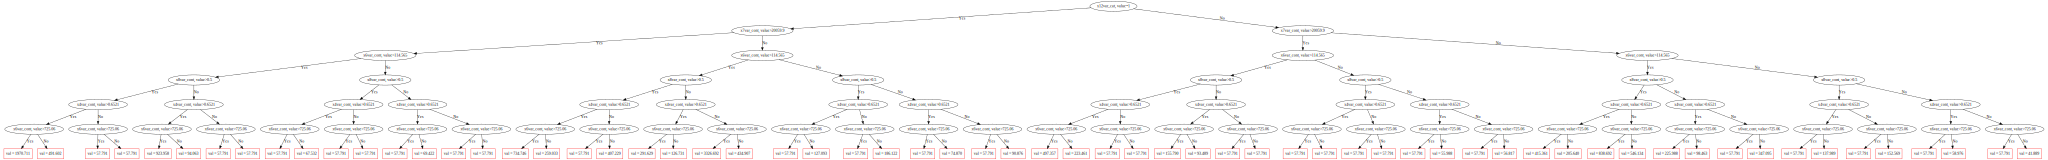

In [63]:
d

In [67]:
import joblib
joblib.dump(model,"catboost_model.pkl")

['catboost_model.pkl']

In [42]:
pool1 = Pool(data=df.iloc[:,2:], label=df['y_var'], cat_features=cat_columns)


shap_values = model.get_feature_importance(pool1,type='Interaction')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

print(shap_values.shape)

shap_values


shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], df.iloc[3,:])